In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import os.path
from os import path
import math
import xarray as xr

In [2]:
#colormap setup
%matplotlib inline
ncolor=5#len(N_seed)*len(r_seed)
color_new=plt.cm.gist_rainbow(np.linspace(0,1,ncolor))#gist_rainbow


seeded_u0.5_cont_dilu100
seeded_u1_cont_dilu100
seeded_u3_cont_dilu100
seeded_u5_cont_dilu100


<Figure size 432x288 with 0 Axes>

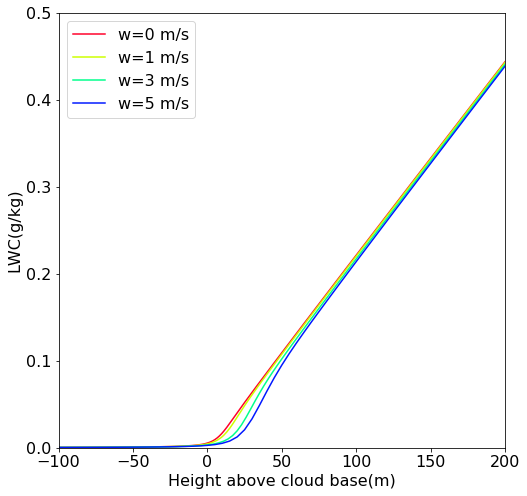

In [55]:
#plot out each case
pdir='/glade/u/home/sisichen/work_dir/projects_results/QLD_seeding/parcel/newkappa/'
case_seed=['seeded_']#['unseeded_','seeded_']
case_up=['u0.5_','u1_','u3_','u5_']#,'seeded_dilute10']
case_air=['cont']#'maritime','cont']
case_dilu=['_dilu100']#['','_dilu100','_dilu10','_undilu']
case_trunc=['']#,'_truncated']
iplot=3 #1 dsd; 2 supersat; 3 LWC
############################## g##########
#  i_hist flag: choose what to measure #
#  1: use Height;                      #
#  2: use time_after_Cb;               #
#  3:use time_after_ini                #
i_hist=1                              #
Height=400 #in meter after Cb
time_after_Cb=120 #get the data at time after reaching Cb
time_after_ini=120 #get the data at time after initial
########################################
ifig=0
plt.clf()
#initialize plot
nplot=1
fig,ax=plt.subplots(nplot,figsize=(8, 8))
for (iseed,iup,iair,idilu,itrunc) in itertools.product(case_seed,case_up,case_air,case_dilu,case_trunc):
    casename=str(iseed)+str(iup)+str(iair)+str(idilu)+str(itrunc)
    figlabel='w='+str(iup)[1:2]+' m/s'#+str(idilu)+str(iup)+str(iair)+str(itrunc)
    unseed_casename='unseeded_'+str(iup)+str(iair)+str(itrunc)
    unseed_outfile=pdir+unseed_casename+'.out'
    dndrfile=pdir+casename+'.dndr'
    radfile=pdir+casename+'.rad'
    outfile=pdir+casename+'.out'
    nradfile=pdir+casename+'.nrad'
    
    if path.exists(dndrfile):
        print(casename)
        dndr_data=pd.read_csv(dndrfile,sep='\s+',index_col=False, header = None)
        rad_data=pd.read_csv(radfile,sep='\s+',index_col=False, header = None)
        nrad_data=pd.read_csv(nradfile,sep='\s+',index_col=False, header = None)
        mean_data=pd.read_csv(outfile,sep='\s+',index_col=False, header = None, names=\
                ['time','H','Sp','lwc','ndrop','pp','temp','thetapp','qvpp','qvs','rm','rhoa',\
                 'whatever','deltaqp'])
        unseed_mean_data=pd.read_csv(unseed_outfile,sep='\s+',index_col=False, header = None, names=\
                ['time','H','Sp','lwc','ndrop','pp','temp','thetapp','qvpp','qvs','rm','rhoa',\
                 'whatever','deltaqp'])
        unseed_Sp = unseed_mean_data.Sp
        
        Time=mean_data.time
        H=mean_data.H
        Sp=mean_data.Sp
        spmax=Sp.max()
        lwc=mean_data.lwc
        ndrop=mean_data.ndrop
        pp=mean_data.pp
        temp=mean_data.temp
        theta=mean_data.thetapp
        qv=mean_data.qvpp
        qvs=mean_data.qvs
        rm=mean_data.rm
        
        #at cloud base
        #cloud_base=mean_data.loc[mean_data['Sp'].ge(0)][:1]#find the first positive Sp value
        #if cloud_base.empty or cloud_base.H.item()>1000:
        #    print('cloud base too tall, H=',cloud_base.H,'adjust to 300m')
        #    cloud_base=mean_data.loc[mean_data['H'].ge(300)][:1]
        #print('cloud base height',cloud_base.H.item())
        #cloud base at the unseeded cloud
        cloud_base=unseed_mean_data.loc[unseed_mean_data['Sp'].ge(0)][:1]
        dndr_Cb=dndr_data.loc[dndr_data.loc[:,0].ge(cloud_base.time.item())][:1]  #iloc[(dndr_data.loc[:,0]-cloud_base.time.item()).abs().argsort()[:1]] #first colume=time
        
        #at maximum sp
        max_sp=mean_data.loc[mean_data['Sp'].ge(spmax)][:1]   #[(mean_data['Sp']-spmax).abs().argsort()[:1]]
        dndr_maxsp=dndr_data.loc[dndr_data.loc[:,0].ge(max_sp.time.item())][:1]  #iloc[(dndr_data.loc[:,0]-max_sp.time.item()).abs().argsort()[:1]] #first colume=time
        
        #at H=Height m above cloud base
        HeightCb=mean_data.loc[mean_data['H'].ge(Height+cloud_base.H.item())][:1]   #iloc[(mean_data['H']-cloud_base['H'].item()-Height).abs().argsort()[:1]]
        dndr_HeightCb=dndr_data.loc[dndr_data.loc[:,0].ge(HeightCb.time.item())][:1]    #iloc[(dndr_data.loc[:,0]-HeightCb.time.item()).abs().argsort()[:1]]
        rad_HeightCb=rad_data.loc[rad_data.loc[:,0].ge(HeightCb.time.item())][:1]      #iloc[(rad_data.loc[:,0]-HeightCb.time.item()).abs().argsort()[:1]]
        nrad_HeightCb=nrad_data.loc[nrad_data.loc[:,0].ge(HeightCb.time.item())][:1]    #iloc[(nrad_data.loc[:,0]-HeightCb.time.item()).abs().argsort()[:1]]
        
        #at T=time_after_Cb sec after reaching cloud base
        H_Time_after_Cb=mean_data.loc[mean_data['time'].ge(time_after_Cb+cloud_base.time.item())][:1]   #iloc[(mean_data['time']-cloud_base['time'].item()-time_after_Cb).abs().argsort()[:1]]
        dndr_Time_after_Cb=dndr_data.loc[dndr_data.loc[:,0].ge(H_Time_after_Cb.time.item())][:1] #iloc[(dndr_data.loc[:,0]-H_Time_after_Cb.time.item()).abs().argsort()[:1]]
        
        #at T=time_after_ini sec after initial time
        H_time_after_ini=mean_data.loc[mean_data['time'].ge(time_after_ini)][:1]   #iloc[(mean_data['time']-time_after_ini).abs().argsort()[:1]]
        dndr_time_after_ini=dndr_data.loc[dndr_data.loc[:,0].ge(H_time_after_ini.time.item())][:1]   #iloc[(dndr_data.loc[:,0]-H_time_after_ini.time.item()).abs().argsort()[:1]]
        
        rad_dry = rad_data.loc[rad_data.loc[:,0].ge(0)][:1]   #iloc[(rad_data.loc[:,0]).abs().argsort()[:1]]
        r_dry=rad_dry.loc[0,1:]
        r3=4/3*math.pi*1e6*r_dry**3 #unit in [g]
        lwc0=r3.sum()
        lwc-lwc0
        #activated droplets
        A=nrad_HeightCb.iloc[0,:]
        B=np.where((rad_HeightCb.iloc[0,1:-1]-rad_dry.iloc[0,1:-1])/rad_dry.iloc[0,:]>2)
        B1=B[0]
        C=rad_HeightCb.iloc[0,:]
        C1=C[B1].values#rad
        A1=A[B1].values#nrad
        C2=np.where(C1>1e-6)
        #C2=C2[0]
        N_act=A1[C2].sum()
        mean_radius=sum(A1[C2]*C1[C2])/A1[C2].sum()
        total_mean_radius=sum(A1*C1)/A1.sum()
        if iplot==2:
            #plot supersaturation
            ax.plot(H-205, Sp,label=figlabel,color=color_new[ifig])#cloud_base.H.item()
        if iplot==3:
            #plot LWC
            ax.plot(H-205, lwc*1e3,label=figlabel,color=color_new[ifig])
            
        #ax[0].plot(H, lwc*1e3,label=figlabel,color=color_new[ifig])
        #ax[0].plot(H, Sp,label=figlabel,color=color_new[ifig])
        if iplot==1:
            #plot DSD
            print('activated number',N_act,'mean_d=',mean_radius*2)
            radius=np.arange(1, 101)
            if (i_hist==1):
                np_hist=dndr_HeightCb.to_numpy()   
            elif (i_hist==2):
                np_hist=dndr_Time_after_Cb.to_numpy()  
            elif (i_hist==3):
                np_hist=dndr_time_after_ini.to_numpy()
            np_hist[0,1]=0.
            ax.step(radius*2,np_hist[0,1:101],label=figlabel,color=color_new[ifig])
        #ax.bar(radius*2-1,np_hist[0,1:101],width=2,label=figlabel,color=color_new[ifig],alpha=0.7)
        ifig=ifig+1
#nplot=1
       
FONT_SIZE = 16
OTHER_SIZE = 12
plt.rc('font', size=FONT_SIZE)
plt.rc('axes', titlesize=FONT_SIZE)
plt.rc('axes', labelsize=FONT_SIZE)   
plt.rc('xtick', labelsize=FONT_SIZE)
plt.rc('ytick', labelsize=FONT_SIZE)   
plt.rc('legend', fontsize=FONT_SIZE)
##for lwc
#ax.set_ylim(0,0.5)
#ax.set_xlim(0,400)
#ax.set_ylabel('LWC(g/kg)')
#ax.set_xlabel('Height (m)')
#for supersat
if iplot==1:
#for dsd
    ax.set_yscale('log')
    ax.set_xlabel('diameter ($\mu m$)')
    ax.set_ylabel('dN/dr ($cm^{-3}$)')
    ax.set_ylim(1e-3,1e5)
    ax.set_xlim(0,100)
    if (i_hist==1):
        ax.set_title('DSD at H='+str(Height)+' m above cloud base')
    elif(i_hist==2):
        ax.set_title('DSD at T='+str(time_after_Cb)+' s after reaching cloud base')
    elif(i_hist==3):
        ax.set_title('DSD at T='+str(time_after_ini)+' s after initial time')
    ax.legend(loc='upper right')#, bbox_to_anchor=(1, 0.5))
if iplot==2:
    ax.set_ylim(-0.01,0.02)
    ax.set_xlim(-100,200)
    ax.set_ylabel('Supersaturation')
    ax.set_xlabel('Height above cloud base(m)')
    ax.legend(loc='upper right')#, bbox_to_anchor=(1, 0.5))
if iplot ==3:
    ax.set_ylim(0,.5)
    ax.set_xlim(-100,200)
    ax.set_ylabel('LWC(g/kg)')
    ax.set_xlabel('Height above cloud base(m)')
    ax.legend(loc='upper left')#, bbox_to_anchor=(1, 0.5))

In [45]:
'w='+str(iup)[1:2]+' m/s'

'w=5 m/s'

seeded_u0.5_cont_dilu100
activated number 540.1005369908701 mean_d= 1.4181433165309137e-05
seeded_u1_cont_dilu100
activated number 997.81941099087 mean_d= 1.1643709914476219e-05
seeded_u3_cont_dilu100
activated number 2110.37817505147 mean_d= 9.168079451805215e-06
seeded_u5_cont_dilu100
activated number 2478.0166879255703 mean_d= 8.707021841497494e-06
seeded_u0.5_maritime_dilu100
activated number 378.23986365367 mean_d= 1.5901622012049254e-05
seeded_u1_maritime_dilu100
activated number 570.58465865367 mean_d= 1.4019684231573777e-05
seeded_u3_maritime_dilu100
activated number 1264.6743406536702 mean_d= 1.0845950492483015e-05
seeded_u5_maritime_dilu100
activated number 1640.85409065367 mean_d= 9.992009839985951e-06


<Figure size 432x288 with 0 Axes>

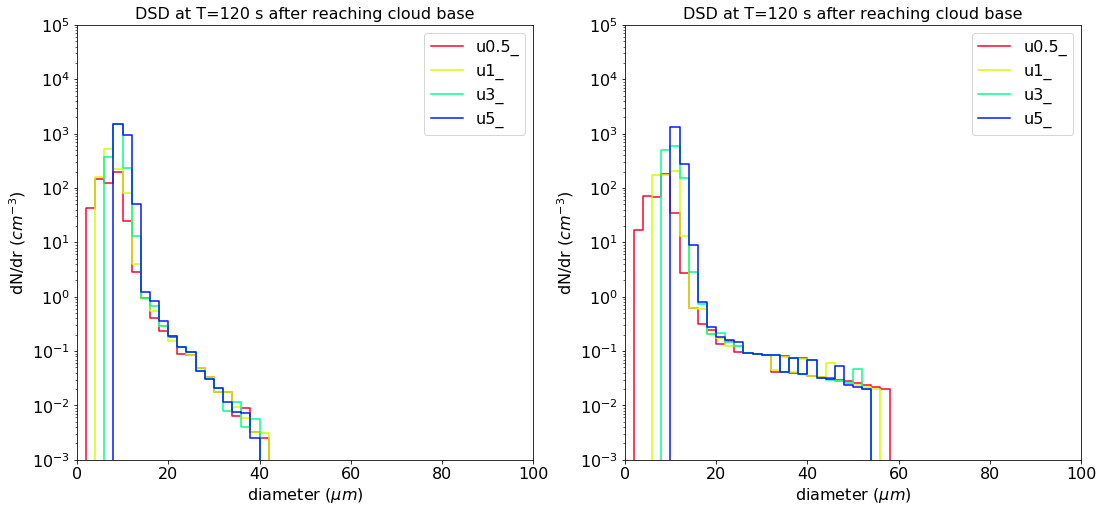

In [6]:
#two subplots
#plot out each case
%matplotlib inline
ncolor=5#len(N_seed)*len(r_seed)
color_new=plt.cm.gist_rainbow(np.linspace(0,1,ncolor))#gist_rainbow
pdir='/glade/u/home/sisichen/work_dir/projects_results/QLD_seeding/parcel/newkappa/'
case_seed=['unseeded_','seeded_']#['unseeded_','seeded_']
case_up=['u0.5_','u1_','u3_','u5_']#,'seeded_dilute10']
case_air=['cont','maritime']
case_dilu=['_dilu100']#['','_dilu100','_dilu10']#['','_dilu100','_dilu10','_undilu']
case_trunc=['']#,'_truncated']
iplot=1 #1 dsd; 2 supersat; 3 LWC
############################## g##########
#  i_hist flag: choose what to measure #
#  1: use Height;                      #
#  2: use time_after_Cb;               #
#  3:use time_after_ini                #
i_hist=2                              #
Height=400 #in meter after Cb
time_after_Cb=120 #get the data at time after reaching Cb
time_after_ini=120 #get the data at time after initial
########################################
icase=0
plt.clf()
#initialize plot
fig,ax=plt.subplots(1,2,figsize=(18, 8))
FONT_SIZE = 16
OTHER_SIZE = 12
plt.rc('font', size=FONT_SIZE)
plt.rc('axes', titlesize=FONT_SIZE)
plt.rc('axes', labelsize=FONT_SIZE)   
plt.rc('xtick', labelsize=FONT_SIZE)
plt.rc('ytick', labelsize=FONT_SIZE)   
plt.rc('legend', fontsize=FONT_SIZE)
for iair in case_air:
    ifig=0
    for (iseed,iup,idilu,itrunc) in itertools.product(case_seed,case_up,case_dilu,case_trunc):
        casename=str(iseed)+str(iup)+str(iair)+str(idilu)+str(itrunc)
        figlabel=str(iup)#+str(idilu)+str(iup)+str(iair)+str(itrunc)
        unseed_casename='unseeded_'+str(iup)+str(iair)+str(itrunc)
        unseed_outfile=pdir+unseed_casename+'.out'
        dndrfile=pdir+casename+'.dndr'
        radfile=pdir+casename+'.rad'
        outfile=pdir+casename+'.out'
        nradfile=pdir+casename+'.nrad'

        if path.exists(dndrfile):
            print(casename)
            dndr_data=pd.read_csv(dndrfile,sep='\s+',index_col=False, header = None)
            rad_data=pd.read_csv(radfile,sep='\s+',index_col=False, header = None)
            nrad_data=pd.read_csv(nradfile,sep='\s+',index_col=False, header = None)
            mean_data=pd.read_csv(outfile,sep='\s+',index_col=False, header = None, names=\
                    ['time','H','Sp','lwc','ndrop','pp','temp','thetapp','qvpp','qvs','rm','rhoa',\
                     'whatever','deltaqp'])
            unseed_mean_data=pd.read_csv(unseed_outfile,sep='\s+',index_col=False, header = None, names=\
                    ['time','H','Sp','lwc','ndrop','pp','temp','thetapp','qvpp','qvs','rm','rhoa',\
                     'whatever','deltaqp'])
            unseed_Sp = unseed_mean_data.Sp

            Time=mean_data.time
            H=mean_data.H
            Sp=mean_data.Sp
            spmax=Sp.max()
            lwc=mean_data.lwc
            ndrop=mean_data.ndrop
            pp=mean_data.pp
            temp=mean_data.temp
            theta=mean_data.thetapp
            qv=mean_data.qvpp
            qvs=mean_data.qvs
            rm=mean_data.rm

            #at cloud base
            #cloud_base=mean_data.loc[mean_data['Sp'].ge(0)][:1]#find the first positive Sp value
            #if cloud_base.empty or cloud_base.H.item()>1000:
            #    print('cloud base too tall, H=',cloud_base.H,'adjust to 300m')
            #    cloud_base=mean_data.loc[mean_data['H'].ge(300)][:1]
            #print('cloud base height',cloud_base.H.item())
            #cloud base at the unseeded cloud
            cloud_base=unseed_mean_data.loc[unseed_mean_data['Sp'].ge(0)][:1]
            dndr_Cb=dndr_data.loc[dndr_data.loc[:,0].ge(cloud_base.time.item())][:1]  #iloc[(dndr_data.loc[:,0]-cloud_base.time.item()).abs().argsort()[:1]] #first colume=time

            #at maximum sp
            max_sp=mean_data.loc[mean_data['Sp'].ge(spmax)][:1]   #[(mean_data['Sp']-spmax).abs().argsort()[:1]]
            dndr_maxsp=dndr_data.loc[dndr_data.loc[:,0].ge(max_sp.time.item())][:1]  #iloc[(dndr_data.loc[:,0]-max_sp.time.item()).abs().argsort()[:1]] #first colume=time

            #at H=Height m above cloud base
            HeightCb=mean_data.loc[mean_data['H'].ge(Height+cloud_base.H.item())][:1]   #iloc[(mean_data['H']-cloud_base['H'].item()-Height).abs().argsort()[:1]]
            dndr_HeightCb=dndr_data.loc[dndr_data.loc[:,0].ge(HeightCb.time.item())][:1]    #iloc[(dndr_data.loc[:,0]-HeightCb.time.item()).abs().argsort()[:1]]
            rad_HeightCb=rad_data.loc[rad_data.loc[:,0].ge(HeightCb.time.item())][:1]      #iloc[(rad_data.loc[:,0]-HeightCb.time.item()).abs().argsort()[:1]]
            nrad_HeightCb=nrad_data.loc[nrad_data.loc[:,0].ge(HeightCb.time.item())][:1]    #iloc[(nrad_data.loc[:,0]-HeightCb.time.item()).abs().argsort()[:1]]

            #at T=time_after_Cb sec after reaching cloud base
            H_Time_after_Cb=mean_data.loc[mean_data['time'].ge(time_after_Cb+cloud_base.time.item())][:1]   #iloc[(mean_data['time']-cloud_base['time'].item()-time_after_Cb).abs().argsort()[:1]]
            dndr_Time_after_Cb=dndr_data.loc[dndr_data.loc[:,0].ge(H_Time_after_Cb.time.item())][:1] #iloc[(dndr_data.loc[:,0]-H_Time_after_Cb.time.item()).abs().argsort()[:1]]

            #at T=time_after_ini sec after initial time
            H_time_after_ini=mean_data.loc[mean_data['time'].ge(time_after_ini)][:1]   #iloc[(mean_data['time']-time_after_ini).abs().argsort()[:1]]
            dndr_time_after_ini=dndr_data.loc[dndr_data.loc[:,0].ge(H_time_after_ini.time.item())][:1]   #iloc[(dndr_data.loc[:,0]-H_time_after_ini.time.item()).abs().argsort()[:1]]

            rad_dry = rad_data.loc[rad_data.loc[:,0].ge(0)][:1]   #iloc[(rad_data.loc[:,0]).abs().argsort()[:1]]
            r_dry=rad_dry.loc[0,1:]
            r3=4/3*math.pi*1e6*r_dry**3 #unit in [g]
            lwc0=r3.sum()
            lwc-lwc0
            #activated droplets
            A=nrad_HeightCb.iloc[0,:]
            B=np.where((rad_HeightCb.iloc[0,1:-1]-rad_dry.iloc[0,1:-1])/rad_dry.iloc[0,:]>2)
            B1=B[0]
            C=rad_HeightCb.iloc[0,:]
            C1=C[B1].values#rad
            A1=A[B1].values#nrad
            C2=np.where(C1>1e-6)
            #C2=C2[0]
            N_act=A1[C2].sum()
            mean_radius=sum(A1[C2]*C1[C2])/A1[C2].sum()
            total_mean_radius=sum(A1*C1)/A1.sum()
            if iplot==2:
                #plot supersaturation
                ax[icase].plot(H, Sp,label=figlabel,color=color_new[ifig])
            if iplot==3:
                #plot LWC
                ax[icase].plot(H, lwc*1e3,label=figlabel,color=color_new[ifig])
            #ax[0].plot(H, lwc*1e3,label=figlabel,color=color_new[ifig])
            #ax[0].plot(H, Sp,label=figlabel,color=color_new[ifig])
            if iplot==1:
                #plot DSD
                print('activated number',N_act,'mean_d=',mean_radius*2)
                radius=np.arange(1, 101)
                if (i_hist==1):
                    np_hist=dndr_HeightCb.to_numpy()   
                elif (i_hist==2):
                    np_hist=dndr_Time_after_Cb.to_numpy()  
                elif (i_hist==3):
                    np_hist=dndr_time_after_ini.to_numpy()
                np_hist[0,1]=0.
                ax[icase].step(radius*2,np_hist[0,1:101],label=figlabel,color=color_new[ifig])
            #ax[icase].bar(radius*2-1,np_hist[0,1:101],width=2,label=figlabel,color=color_new[ifig],alpha=0.7)
            ifig=ifig+1
    #nplot=1
    ##for lwc
    #ax.set_ylim(0,0.5)
    #ax.set_xlim(0,400)
    #ax.set_ylabel('LWC(g/kg)')
    #ax.set_xlabel('Height (m)')
    #for supersat
    if iplot==1:
    #for dsd
        ax[icase].set_yscale('log')
        ax[icase].set_xlabel('diameter ($\mu m$)')
        ax[icase].set_ylabel('dN/dr ($cm^{-3}$)')
        ax[icase].set_ylim(1e-3,1e5)
        ax[icase].set_xlim(0,100)
        if (i_hist==1):
            ax[icase].set_title(str(iair))#('DSD at H='+str(Height)+' m above cloud base')
        elif(i_hist==2):
            ax[icase].set_title('DSD at T='+str(time_after_Cb)+' s after reaching cloud base')
        elif(i_hist==3):
            ax[icase].set_title('DSD at T='+str(time_after_ini)+' s after initial time')
        ax[icase].legend(loc='upper right')#, bbox_to_anchor=(1, 0.5))
    if iplot==2:
        ax[icase].set_ylim(-0.02,0.02)
        ax[icase].set_xlim(100,800)
        ax[icase].set_title(str(iair))
        ax[icase].set_ylabel('Supersaturation')
        ax[icase].set_xlabel('Height (m)')
        ax[icase].legend(loc='upper right')#, bbox_to_anchor=(1, 0.5))
    if iplot ==3:
        ax[icase].set_ylim(0,.5)
        ax[icase].set_xlim(0,400)
        ax[icase].set_title(str(iair))
        ax[icase].set_ylabel('LWC(g/kg)')
        ax[icase].set_xlabel('Height (m)')
        ax[icase].legend(loc='upper left')#, bbox_to_anchor=(1, 0.5))
    icase = icase+1


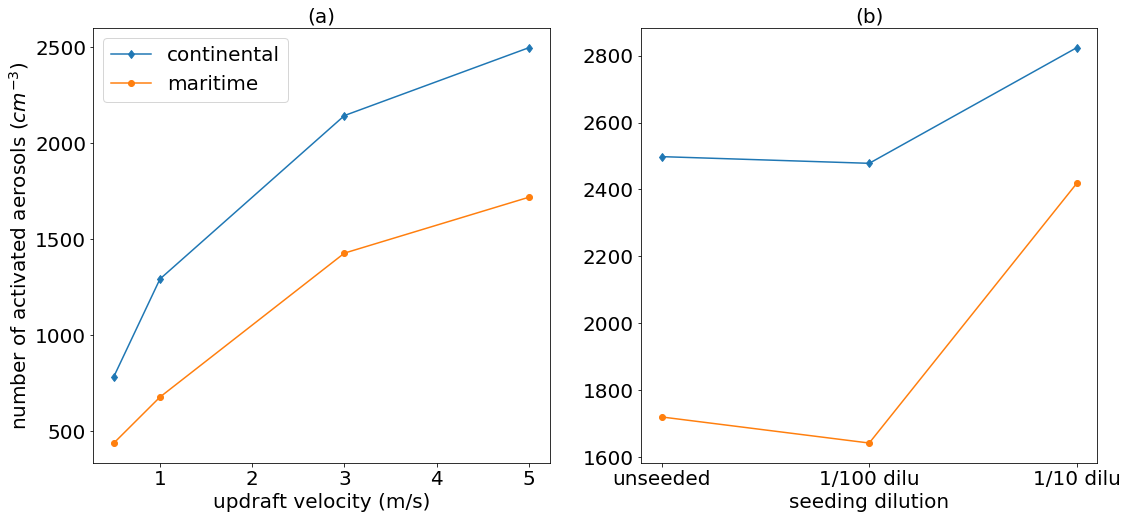

In [8]:
updrafts=[0.5,1,3,5]
activation_unseed_cont=[785.5632,1293.7443,2144.88275,2498.4156]
activation_unseed_maritime=[439.47589,678.80,1428.579,1719.565]
seeding_dilution=['unseeded','1/100 dilu','1/10 dilu','undilu']
activation_u5_cont=[2498,2478,2824,21262]
activation_u05_cont=[786,540,2191,21248]
activation_u5_maritime=[1719,1641,2418,21242]
activation_u05_maritime=[439,378,2155,21235]
fig,ax=plt.subplots(1,2,figsize=(18, 8))
FONT_SIZE = 20

plt.rc('font', size=FONT_SIZE)
plt.rc('axes', titlesize=FONT_SIZE)
plt.rc('axes', labelsize=FONT_SIZE)   
plt.rc('xtick', labelsize=FONT_SIZE)
plt.rc('ytick', labelsize=FONT_SIZE)   
plt.rc('legend', fontsize=FONT_SIZE)


ax[0].plot(updrafts,activation_unseed_cont,'-d',label='continental')
ax[0].plot(updrafts,activation_unseed_maritime,'-o',label='maritime')  
ax[0].set_xlabel('updraft velocity (m/s)')
ax[0].set_title('(a)')
ax[1].set_title('(b)')
ax[1].plot(seeding_dilution[0:3],activation_u5_cont[0:3],'-d',label='continental')
ax[1].plot(seeding_dilution[0:3],activation_u5_maritime[0:3],'-o',label='maritime')
ax[1].set_xlabel('seeding dilution')
ax[0].set_ylabel('number of activated aerosols ($cm^{-3}$)')
ax[0].legend(loc='upper left')

In [20]:
casename

'seeded_u5_contdilu100'

unseeded_u0.5_cont 0
activated number 785.5632303780001 mean_d= 1.2751667302210613e-05
seeded_u0.5_cont_dilu100 1
activated number 540.1005369908701 mean_d= 1.4181433165309137e-05
seeded_u0.5_cont_dilu10 2
activated number 2191.4022394398994 mean_d= 8.179788814855593e-06
unseeded_u5_cont 3
activated number 2498.4156360979 mean_d= 8.727058011761962e-06
seeded_u5_cont_dilu100 4
activated number 2478.0166879255703 mean_d= 8.707021841497494e-06
seeded_u5_cont_dilu10 5
activated number 2823.9300773746 mean_d= 8.104545282605838e-06
unseeded_u0.5_cont_truncated 0
activated number 710.5309459784 mean_d= 1.3237262872747374e-05
seeded_u0.5_cont_dilu100_truncated 1
activated number 545.1565167690701 mean_d= 1.4115112363427225e-05
seeded_u0.5_cont_dilu10_truncated 2
activated number 2180.4067162180995 mean_d= 8.211120001227318e-06
unseeded_u5_cont_truncated 3
activated number 710.5229386532002 mean_d= 1.3298581983240046e-05
seeded_u5_cont_dilu100_truncated 4
activated number 922.7734794800701 mean

<Figure size 432x288 with 0 Axes>

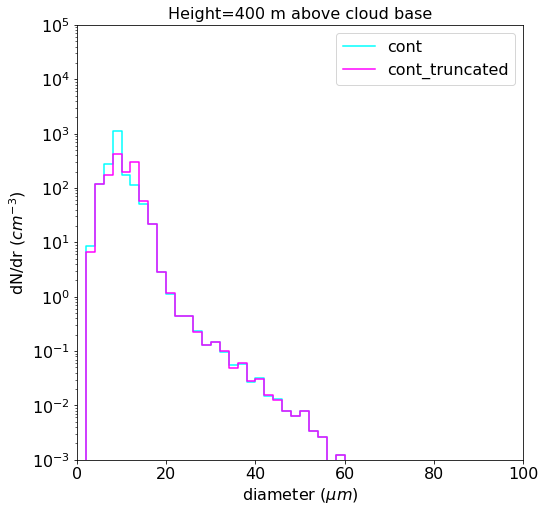

In [23]:
#average out the DSDs
#colormap setup
%matplotlib inline
ncolor=2#len(N_seed)*len(r_seed)
color_new=plt.cm.cool(np.linspace(0,1,ncolor))#gist_rainbow

pdir='/glade/u/home/sisichen/work_dir/projects_results/QLD_seeding/parcel/newkappa/'
case_seed=['unseeded_','seeded_']#'seeded_','unseeded_']
case_up=['u0.5_','u5_']#['u0.5_','u1_','u3_','u5_']#,'seeded_dilute10']
case_air=['cont']#'maritime','cont']
#case_tail=['mix','dust','seasalt',
case_dilu=['','_dilu100','_dilu10']#,'_undilu']
case_trunc=['','_truncated']#,'_truncated']#,'_trunc0.05']
########################################
#  i_hist flag: choose what to measure #
#  1: use Height;                      #
#  2: use time_after_Cb;               #
#  3:use time_after_ini                #
i_hist=1                              #
Height=400 #in meter after Cb
time_after_Cb=60 #get the data at time after reaching Cb
time_after_ini=120 #get the data at time after initial
########################################
ifig=0
plt.clf()
#initialize plot
nplot=1
fig,ax=plt.subplots(nplot,figsize=(8, 8))
for itrunc in case_trunc:
    iiter=0
    figlabel=str(case_air[0])+str(itrunc)#str(iseed)+str(idilu)#str(iup)+str(iup)+str(iair)+str(itrunc)
    for (iup,iair,idilu,iseed) in itertools.product(case_up,case_air,case_dilu,case_seed):
        casename=str(iseed)+str(iup)+str(iair)+str(idilu)+str(itrunc)
        unseed_casename='unseeded_'+str(iup)+str(iair)+str(itrunc)
        unseed_outfile=pdir+unseed_casename+'.out'
        dndrfile=pdir+casename+'.dndr'
        radfile=pdir+casename+'.rad'
        outfile=pdir+casename+'.out'
        nradfile=pdir+casename+'.nrad'
        if path.exists(dndrfile):
            print(casename,iiter)
            dndr_data=pd.read_csv(dndrfile,sep='\s+',index_col=False, header = None)
            rad_data=pd.read_csv(radfile,sep='\s+',index_col=False, header = None)
            nrad_data=pd.read_csv(nradfile,sep='\s+',index_col=False, header = None)
            mean_data=pd.read_csv(outfile,sep='\s+',index_col=False, header = None, names=\
                    ['time','H','Sp','lwc','ndrop','pp','temp','thetapp','qvpp','qvs','rm','rhoa',\
                     'whatever','deltaqp'])
            unseed_mean_data=pd.read_csv(unseed_outfile,sep='\s+',index_col=False, header = None, names=\
                ['time','H','Sp','lwc','ndrop','pp','temp','thetapp','qvpp','qvs','rm','rhoa',\
                 'whatever','deltaqp'])
            unseed_Sp = unseed_mean_data.Sp
            
            Time=mean_data.time
            H=mean_data.H
            Sp=mean_data.Sp
            spmax=Sp.max()
            lwc=mean_data.lwc
            ndrop=mean_data.ndrop
            pp=mean_data.pp
            temp=mean_data.temp
            theta=mean_data.thetapp
            qv=mean_data.qvpp
            qvs=mean_data.qvs
            rm=mean_data.rm
            #at cloud base
            #cloud_base=mean_data.iloc[(mean_data['Sp'] - 0).abs().argsort()[:1]]
            #dndr_Cb=dndr_data.iloc[(dndr_data.loc[:,0]-cloud_base.time.item()).abs().argsort()[:1]] #first colume=time
            #cloud base at the unseeded cloud
            cloud_base=unseed_mean_data.loc[unseed_mean_data['Sp'].ge(0)][:1]
            dndr_Cb=dndr_data.loc[dndr_data.loc[:,0].ge(cloud_base.time.item())][:1]
            
            #at maximum sp
            max_sp=mean_data.loc[mean_data['Sp'].ge(spmax)][:1]   #[(mean_data['Sp']-spmax).abs().argsort()[:1]]
            dndr_maxsp=dndr_data.loc[dndr_data.loc[:,0].ge(max_sp.time.item())][:1]  #iloc[(dndr_data.loc[:,0]-max_sp.time.item()).abs().argsort()[:1]] #first colume=time

            #at H=Height m above cloud base
            HeightCb=mean_data.loc[mean_data['H'].ge(Height+cloud_base.H.item())][:1]   #iloc[(mean_data['H']-cloud_base['H'].item()-Height).abs().argsort()[:1]]
            dndr_HeightCb=dndr_data.loc[dndr_data.loc[:,0].ge(HeightCb.time.item())][:1]    #iloc[(dndr_data.loc[:,0]-HeightCb.time.item()).abs().argsort()[:1]]
            rad_HeightCb=rad_data.loc[rad_data.loc[:,0].ge(HeightCb.time.item())][:1]      #iloc[(rad_data.loc[:,0]-HeightCb.time.item()).abs().argsort()[:1]]
            nrad_HeightCb=nrad_data.loc[nrad_data.loc[:,0].ge(HeightCb.time.item())][:1]    #iloc[(nrad_data.loc[:,0]-HeightCb.time.item()).abs().argsort()[:1]]

            #at T=time_after_Cb sec after reaching cloud base
            H_Time_after_Cb=mean_data.loc[mean_data['time'].ge(time_after_Cb+cloud_base.time.item())][:1]   #iloc[(mean_data['time']-cloud_base['time'].item()-time_after_Cb).abs().argsort()[:1]]
            dndr_Time_after_Cb=dndr_data.loc[dndr_data.loc[:,0].ge(H_Time_after_Cb.time.item())][:1] #iloc[(dndr_data.loc[:,0]-H_Time_after_Cb.time.item()).abs().argsort()[:1]]

            #at T=time_after_ini sec after initial time
            H_time_after_ini=mean_data.loc[mean_data['time'].ge(time_after_ini)][:1]   #iloc[(mean_data['time']-time_after_ini).abs().argsort()[:1]]
            dndr_time_after_ini=dndr_data.loc[dndr_data.loc[:,0].ge(H_time_after_ini.time.item())][:1]   #iloc[(dndr_data.loc[:,0]-H_time_after_ini.time.item()).abs().argsort()[:1]]

            rad_dry = rad_data.loc[rad_data.loc[:,0].ge(0)][:1]   #iloc[(rad_data.loc[:,0]).abs().argsort()[:1]]
            r_dry=rad_dry.loc[0,1:]            
            #activated droplets
            A=nrad_HeightCb.iloc[0,:]
            B=np.where((rad_HeightCb.iloc[0,1:-1]-rad_dry.iloc[0,1:-1])/rad_dry.iloc[0,:]>2)
            B1=B[0]
            C=rad_HeightCb.iloc[0,:]
            C1=C[B1].values#rad
            A1=A[B1].values#nrad
            C2=np.where(C1>1e-6)
            N_act=A1[C2].sum()
            mean_radius=sum(A1[C2]*C1[C2])/A1[C2].sum()
            total_mean_radius=sum(A1*C1)/A1.sum()
            print('activated number',N_act,'mean_d=',mean_radius*2)
            
            fitdimSp=np.zeros(2002)
            fitdimlwc=np.zeros(2002)
            lensp=len(Sp)
            fitdimSp[0:lensp]=Sp
            fitdimlwc[0:lensp]=lwc
            if iiter==0:
                Sp_mean=[fitdimSp]
                lwc_mean=[fitdimlwc]
                if (i_hist==1):
                    np_hist=[dndr_HeightCb.to_numpy()]
                elif (i_hist==2):
                    np_hist=[dndr_time_after_Cb.to_numpy()]
                elif (i_hist==3):
                    np_hist=[dndr_time_after_ini.to_numpy()]
            else:
                Sp_mean=np.append(Sp_mean,[fitdimSp],axis=0)
                lwc_mean=np.append(lwc_mean,[fitdimlwc],axis=0)
                if (i_hist==1):
                    np_hist=np.append(np_hist,[dndr_HeightCb.to_numpy()],axis=0)
                elif (i_hist==2):
                    np_hist=np.append(np_hist,[dndr_time_after_Cb.to_numpy()],axis=0)
                elif (i_hist==3):
                    np_hist=np.append(np_hist,[dndr_time_after_ini.to_numpy()],axis=0)
            #ax.bar(radius*2-1,np_hist[0,1:101],width=2,label=figlabel,color=color_new[ifig],alpha=0.7)
            iiter=iiter+1

    #plot DSD
    radius=np.arange(1, 101)
    np_hist=np_hist.mean(axis=0)
    np_hist[0,1]=0.
    ax.step(radius*2,np_hist[0,1:101],label=figlabel,color=color_new[ifig])
    ifig=ifig+1

#for dsd
ax.set_yscale('log')
ax.set_xlabel('diameter ($\mu m$)')
ax.set_ylabel('dN/dr ($cm^{-3}$)')
ax.set_ylim(1e-3,1e5)
ax.set_xlim(0,100)
if (i_hist==1):
    ax.set_title('Height='+str(Height)+' m above cloud base')
elif(i_hist==2):
    ax.set_title('T='+str(time_after_Cb)+' s after reaching cloud base')
elif(i_hist==3):
    ax.set_title('T='+str(time_after_ini)+' s after initial time')
ax.legend(loc='upper right')#, bbox_to_anchor=(1, 0.5))
    
FONT_SIZE = 16
OTHER_SIZE = 12
plt.rc('font', size=FONT_SIZE)
plt.rc('axes', titlesize=FONT_SIZE)
plt.rc('axes', labelsize=FONT_SIZE)   
plt.rc('xtick', labelsize=FONT_SIZE)
plt.rc('ytick', labelsize=FONT_SIZE)   
plt.rc('legend', fontsize=FONT_SIZE)

In [15]:
ax.legend(loc='upper right')#, bbox_to_anchor=(1, 0.5))

No handles with labels found to put in legend.
